# Explore here

It's recommended to use this notebook for exploration purposes.

For example: 

1. You could import the CSV generated by python into your notebook and explore it.
2. You could connect to your database using `pandas.read_sql` from this notebook and explore it.

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [7]:
# Example importing the CSV here

df_raw = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv', sep=";")


In [8]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [17]:
df_raw.sample(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
21504,29,technician,married,university.degree,no,no,no,cellular,aug,tue,...,3,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
31797,45,technician,divorced,high.school,no,yes,no,cellular,may,thu,...,1,999,1,failure,-1.8,92.893,-46.2,1.327,5099.1,no
27361,33,admin.,married,university.degree,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,no
12425,31,entrepreneur,married,basic.6y,no,yes,yes,cellular,jul,mon,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,yes
10348,41,technician,single,university.degree,no,no,no,telephone,jun,mon,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.960,5228.1,no
30963,45,admin.,single,high.school,no,yes,no,cellular,may,tue,...,3,999,0,nonexistent,-1.8,92.893,-46.2,1.344,5099.1,no
1474,35,blue-collar,married,basic.9y,no,yes,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
36780,52,entrepreneur,married,high.school,no,yes,no,cellular,jun,fri,...,3,999,0,nonexistent,-2.9,92.963,-40.8,1.268,5076.2,no
26171,38,admin.,single,university.degree,no,yes,no,cellular,nov,wed,...,6,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no
27440,39,admin.,single,university.degree,no,no,no,cellular,nov,fri,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,no


In [9]:
round(df_raw.describe())

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.0,41188.0,41188.0,41188.0,41188.0,41188.0,41188.0,41188.0,41188.0,41188.0
mean,40.0,258.0,3.0,962.0,0.0,0.0,94.0,-41.0,4.0,5167.0
std,10.0,259.0,3.0,187.0,0.0,2.0,1.0,5.0,2.0,72.0
min,17.0,0.0,1.0,0.0,0.0,-3.0,92.0,-51.0,1.0,4964.0
25%,32.0,102.0,1.0,999.0,0.0,-2.0,93.0,-43.0,1.0,5099.0
50%,38.0,180.0,2.0,999.0,0.0,1.0,94.0,-42.0,5.0,5191.0
75%,47.0,319.0,3.0,999.0,0.0,1.0,94.0,-36.0,5.0,5228.0
max,98.0,4918.0,56.0,999.0,7.0,1.0,95.0,-27.0,5.0,5228.0


In [10]:
df_raw.describe(include="O")

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [11]:
df_raw.duplicated().any()

True

In [12]:
len(df_raw[df_raw.duplicated() == True])

12

In [13]:
df_raw = df_raw[df_raw.duplicated() == False]
len(df_raw)

41176

In [14]:
# busco unicos por observacion
for col in df_raw.select_dtypes(include="object").columns:
    print(col)
    print(df_raw[col].unique())

job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital
['married' 'single' 'divorced' 'unknown']
education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default
['no' 'unknown' 'yes']
housing
['no' 'yes' 'unknown']
loan
['no' 'yes' 'unknown']
contact
['telephone' 'cellular']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week
['mon' 'tue' 'wed' 'thu' 'fri']
poutcome
['nonexistent' 'failure' 'success']
y
['no' 'yes']


In [15]:
for col in df_raw.select_dtypes(include="object").columns:
    df_raw[col] = np.where(((df_raw[col] == 'unknown') | (df_raw[col] == 'nonexistent')),df_raw[col].mode(),df_raw[col])

In [16]:
for col in df_raw.select_dtypes(include="object").columns:
    print(col)
    print(df_raw[col].unique())

job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'entrepreneur' 'student']
marital
['married' 'single' 'divorced']
education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'university.degree' 'illiterate']
default
['no' 'yes']
housing
['no' 'yes']
loan
['no' 'yes']
contact
['telephone' 'cellular']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week
['mon' 'tue' 'wed' 'thu' 'fri']
poutcome
['nonexistent' 'failure' 'success']
y
['no' 'yes']


In [18]:
df_raw['job'].value_counts()

admin.           10749
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
Name: job, dtype: int64

In [19]:
df_raw['education'].value_counts()

university.degree      13894
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
illiterate                18
Name: education, dtype: int64

In [20]:
df_raw['housing'].value_counts()

yes    22561
no     18615
Name: housing, dtype: int64

In [21]:
df_raw['loan'].value_counts()

no     34928
yes     6248
Name: loan, dtype: int64

In [22]:
df_raw['contact'].value_counts()

cellular     26135
telephone    15041
Name: contact, dtype: int64

In [23]:
df_raw['campaign'].value_counts()

1     17634
2     10568
3      5340
4      2650
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
16       51
15       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
28        8
26        8
25        8
31        7
30        7
35        5
32        4
33        4
34        3
42        2
40        2
43        2
56        1
39        1
41        1
37        1
Name: campaign, dtype: int64

In [24]:
df_raw['job'] = pd.Categorical(df_raw['job'])
df_raw['marital'] = pd.Categorical(df_raw['marital'])
df_raw['housing'] = pd.Categorical(df_raw['housing'])

In [25]:
df_raw.groupby(['y','job','default'])[['y']].size()

y    job            default
no   admin.         no         9361
                    yes           0
     blue-collar    no         8615
                    yes           0
     entrepreneur   no         1332
                    yes           0
     housemaid      no          954
                    yes           0
     management     no         2596
                    yes           0
     retired        no         1284
                    yes           0
     self-employed  no         1272
                    yes           0
     services       no         3644
                    yes           0
     student        no          600
                    yes           0
     technician     no         6007
                    yes           2
     unemployed     no          869
                    yes           1
yes  admin.         no         1388
                    yes           0
     blue-collar    no          638
                    yes           0
     entrepreneur   no          124


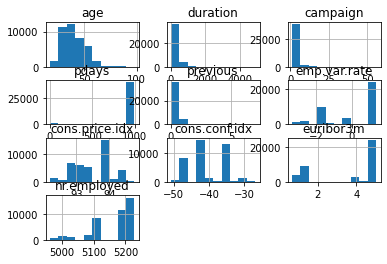

In [26]:
df_raw.hist()
plt.show()

In [27]:
# no hay balance en la información 
df_raw['y'].value_counts()

no     36537
yes     4639
Name: y, dtype: int64

In [28]:
df_raw[df_raw.duplicated(keep=False)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
236,56,blue-collar,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5664,56,blue-collar,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
19451,33,admin.,married,university.degree,no,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.968,5228.1,no
19608,33,admin.,married,university.degree,no,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.968,5228.1,no


In [31]:
df_raw_sd  = df_raw.drop_duplicates()

In [32]:
df_raw_sd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41174 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             41174 non-null  int64   
 1   job             41174 non-null  category
 2   marital         41174 non-null  category
 3   education       41174 non-null  object  
 4   default         41174 non-null  object  
 5   housing         41174 non-null  category
 6   loan            41174 non-null  object  
 7   contact         41174 non-null  object  
 8   month           41174 non-null  object  
 9   day_of_week     41174 non-null  object  
 10  duration        41174 non-null  int64   
 11  campaign        41174 non-null  int64   
 12  pdays           41174 non-null  int64   
 13  previous        41174 non-null  int64   
 14  poutcome        41174 non-null  object  
 15  emp.var.rate    41174 non-null  float64 
 16  cons.price.idx  41174 non-null  float64 
 17  cons.conf.id

In [33]:
df_raw_sd.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [34]:
#copio y agrupo 
df_proc = df_raw_sd.copy()

df_proc['age'] = pd.cut(x=df_proc['age'], bins=[10,20,30,40,50,60,70,80,90,100])


In [35]:
df_proc.sample(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
34745,"(30, 40]",management,married,basic.4y,no,yes,no,telephone,may,thu,...,2,999,1,failure,-1.8,92.893,-46.2,1.266,5099.1,no
3443,"(30, 40]",blue-collar,divorced,basic.9y,no,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,no
27027,"(40, 50]",blue-collar,single,basic.9y,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,no
26426,"(40, 50]",management,divorced,high.school,no,no,no,cellular,nov,thu,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.076,5195.8,no
23654,"(30, 40]",admin.,married,university.degree,no,no,no,cellular,aug,thu,...,11,999,0,nonexistent,1.4,93.444,-36.1,4.962,5228.1,no


In [37]:
df_proc = df_proc.replace({'no': 0, 'yes': 1})
df_proc

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,"(50, 60]",housemaid,married,basic.4y,0,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,"(50, 60]",services,married,high.school,0,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,"(30, 40]",services,married,high.school,0,1,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,"(30, 40]",admin.,married,basic.6y,0,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,"(50, 60]",services,married,high.school,0,0,1,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,"(70, 80]",retired,married,professional.course,0,1,0,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,"(40, 50]",blue-collar,married,professional.course,0,0,0,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,"(50, 60]",retired,married,university.degree,0,1,0,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,"(40, 50]",technician,married,professional.course,0,0,0,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [60]:
df_proc = pd.get_dummies(df_proc, columns = ['job', 'marital', 'default','housing', 'loan', 'contact', 'poutcome'])
df_proc.head()

,age,education,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,...,default_1,housing_0,housing_1,loan_0,loan_1,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success
0,"(50, 60]",basic.4y,may,mon,261,1,999,0,1.1,93.994,...,0,1,0,1,0,0,1,0,1,0
1,"(50, 60]",high.school,may,mon,149,1,999,0,1.1,93.994,...,0,1,0,1,0,0,1,0,1,0
2,"(30, 40]",high.school,may,mon,226,1,999,0,1.1,93.994,...,0,0,1,1,0,0,1,0,1,0
3,"(30, 40]",basic.6y,may,mon,151,1,999,0,1.1,93.994,...,0,1,0,1,0,0,1,0,1,0
4,"(50, 60]",high.school,may,mon,307,1,999,0,1.1,93.994,...,0,1,0,0,1,0,1,0,1,0


In [61]:
month_dict={'may':5,'jul':7,'aug':8,'jun':6,'nov':11,'apr':4,'oct':10,'sep':9,'mar':3,'dec':12}
df_proc['month']= df_proc['month'].map(month_dict) 

day_dict={'thu':5,'mon':2,'wed':4,'tue':3,'fri':6}
df_proc['day_of_week']= df_proc['day_of_week'].map(day_dict) 

In [63]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df_proc['age'] = encoder.fit_transform(df_proc['age'])
df_proc['education'] = encoder.fit_transform(df_proc['education'])

In [64]:
# separo X, y para predicción
X=df_proc.drop('y', axis=1)
y=df_proc['y']

In [65]:
X_dummies = pd.get_dummies(X, drop_first= True)

In [66]:
# escalo
scaler = StandardScaler()
scaler.fit(X_dummies)
X_dummies = scaler.transform(X_dummies)
X_dummies

array([[ 1.44949696, -1.78020445, -0.78771648, ..., -0.33935482,
         0.39778424, -0.18573266],
       [ 1.44949696, -0.33871813, -0.78771648, ..., -0.33935482,
         0.39778424, -0.18573266],
       [-0.42084221, -0.33871813, -0.78771648, ..., -0.33935482,
         0.39778424, -0.18573266],
       ...,
       [ 1.44949696,  1.10276819,  2.1520033 , ..., -0.33935482,
         0.39778424, -0.18573266],
       [ 0.51432737,  0.62227275,  2.1520033 , ..., -0.33935482,
         0.39778424, -0.18573266],
       [ 3.31983613,  0.62227275,  2.1520033 , ...,  2.94676824,
        -2.51392566, -0.18573266]])

In [67]:
X_train,X_test,y_train,y_test=train_test_split(X_dummies,y,random_state=40, test_size= 0.2)

In [68]:
model = LogisticRegression(random_state=432)
model.fit(X_train, y_train)

LogisticRegression(random_state=432)

In [69]:
y_pred = model.predict(X_test)

In [70]:
accuracy_score(y_test, y_pred)

0.9130540376442016

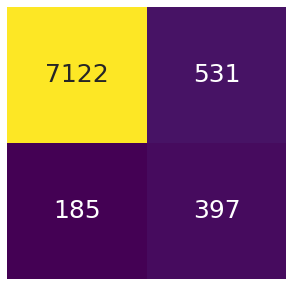

In [71]:
bank_cm = confusion_matrix(y_pred, y_test)
# convert the ndarray to a pandas dataframe
cm_df = pd.DataFrame(bank_cm)
# set the size of the figure
plt.figure(figsize = (5,5))
sns.heatmap(cm_df, 
           annot=True, annot_kws={"size": 25},
           fmt="d",         # decimals format
           xticklabels=False, 
           yticklabels=False,
           cmap="viridis", 
           cbar=False)
plt.show()

In [48]:
# define models and parameters

model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# define grid search

grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_dummies, y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

Best: 0.910947 using {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.910858 (0.003325) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.910866 (0.003326) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.910858 (0.003325) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.910898 (0.003334) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.910874 (0.003320) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.910898 (0.003334) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.910939 (0.003302) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.910947 (0.003277) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.910947 (0.003289) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.910882 (0.003224) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.910882 (0.003224) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.910939 (0.003210) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.910575 (0.003200) with: {

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [54]:
## Best: 0.910947 using {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
model_with_CV = LogisticRegression(C= 0.1, penalty= 'l2', solver= 'lbfgs', random_state=132, class_weight={0:0.3, 1:0.7}) #class_weight le doy 30% de peso al 0 y un 70% al 1


In [55]:

model_with_CV.fit(X_train, y_train)

LogisticRegression(C=0.1, class_weight={0: 0.3, 1: 0.7}, random_state=132)

In [56]:
y_pred = model_with_CV.predict(X_test)

In [57]:
accuracy_score(y_test, y_pred)

0.9083181542197936

In [58]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      7307
           1       0.58      0.68      0.63       928

    accuracy                           0.91      8235
   macro avg       0.77      0.81      0.79      8235
weighted avg       0.92      0.91      0.91      8235



In [ ]:
Conclusion

La data se encuentra desbalanceada a favor del valor "0". Por ese motivo agregamos una ponderación en el valor "1" con un class_weigth de 70%.